In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 問1: 図示

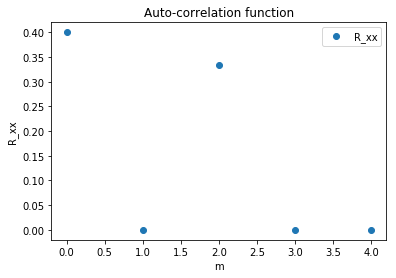

In [2]:
r_xx_1 = [2/5, 0, 1/3, 0, 0]
m = list(range(5))
%matplotlib inline
plt.plot(m, r_xx_1,'o', label='R_xx')
plt.legend()
plt.title("Auto-correlation function")
plt.xlabel("m")
plt.ylabel("R_xx")
plt.show()

## 問3: 図示

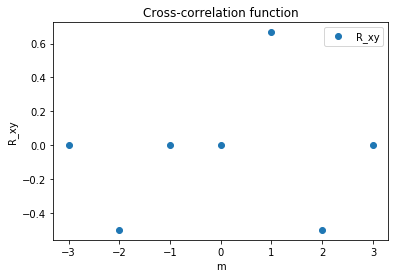

In [3]:
r_xy_3 = [0, -1/2, 0, 0, 2/3, -1/2, 0]
m = list(range(-3, 4))
plt.plot(m, r_xy_3,'o', label='R_xy')
plt.legend()
plt.title("Cross-correlation function")
plt.xlabel("m")
plt.ylabel("R_xy")
plt.show()

# 問5

In [4]:
""" 信号の準備 """
x_n = np.array([1.0, 0.0, 1.0, 0.0, 0.0])

In [5]:
""" mのときのxの自己相関 """
def auto_corr (x, m):
    # 信号xとmずれた信号xの内積
    if m == 0:
        corr_sum = (x * x).sum()
    else:
        corr_sum = (x[:-m] * x[m:]).sum()
    # 総数-|m|で割る
    r_xx = (1 / (x.shape[0] - abs(m))) * corr_sum
    return r_xx

In [6]:
""" x_nの自己相関関数 """
def auto_corr_function (x_n):
    m = range(x_n.shape[0])
    r_xx = []
    # mずれた信号との自己相関を計算していきリストに格納
    for i in m:
        r_xx.append(auto_corr(x_n, i))
#     r_xx = r_xx[::-1] + r_xx[1:]
    return np.array(r_xx)

In [7]:
r_xx_5 = auto_corr_function(x_n)
print(r_xx_5)

[ 0.4         0.          0.33333333  0.          0.        ]


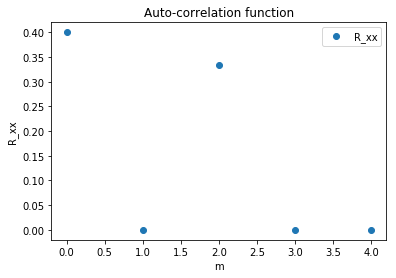

In [8]:
# plot
m = list(range(len(x_n)))
plt.plot(m, r_xx_5,'o', label='R_xx')
plt.legend()
plt.title("Auto-correlation function")
plt.xlabel("m")
plt.ylabel("R_xx")
plt.show()

## 確認
問1の結果と比較すると同様の結果となっているため，信号の自己相関関数を計算するプログラムが正常に動くことが確認できた．

# 問6

In [9]:
""" 信号の準備 """
x_n = np.array([0.0, 1.0, -1.0, 0.0])
y_n = np.array([1.0, 1.0, 1.0, -1.0])

In [10]:
""" mのときのxとyの相互相関 """
def cross_corr (x, y, m):
    # 信号xとmずれた信号yの内積
    if m == 0:
        corr_sum = (x * y).sum()
    elif m < 0:
        corr_sum = (x[-m:] * y[:m]).sum()
    else:
        corr_sum = (x[:-m] * y[m:]).sum()
    # 総数-|m|で割る
    r_xx = (1 / (x.shape[0] - abs(m))) * corr_sum
    return r_xx

In [11]:
""" x_nとy_nの相互相関関数 """
def cross_corr_function (x_n, y_n):
    signal_size = x_n.shape[0]
    m = range(-signal_size + 1, signal_size)
    r_xy = []
    # x_nとmずれた信号y_nとの相互相関を計算していきリストに格納
    for i in m:
        r_xy.append(cross_corr(x_n, y_n, i))
    return np.array(r_xy)

In [12]:
r_xy_6 = cross_corr_function(x_n, y_n)
print(r_xy_6)

[ 0.         -0.5         0.          0.          0.66666667 -0.5         0.        ]


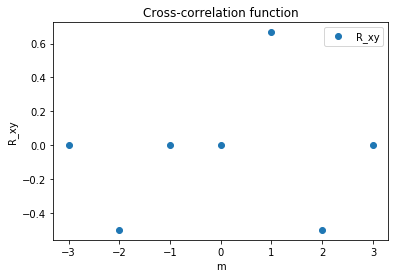

In [13]:
# plot
m = list(range(-len(y_n)+1,len(y_n)))
plt.plot(m, r_xy_6,'o', label='R_xy')
plt.legend()
plt.title("Cross-correlation function")
plt.xlabel("m")
plt.ylabel("R_xy")
plt.show()

## 確認
問3の結果と比較すると同様の結果となっているため，信号の相互相関関数を計算するプログラムが正常に動くことが確認できた．

# 問7

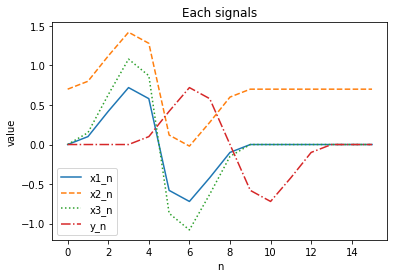

In [14]:
""" 信号の準備 """
y_n = np.array([0.0, 0.0, 0.0, 0.0, 0.1, 0.42, 0.72, 0.58, 0.0, -0.58, -0.72, -0.42, -0.10, 0.0, 0.0, 0.0])
x1_n = np.array([0.0, 0.1, 0.42, 0.72, 0.58, 0.0 -0.58, -0.72, -0.42, -0.10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
x2_n = x1_n + 0.7
x3_n = 1.5 * x1_n

m = list(range(len(y_n)))

plt.plot(m, x1_n, '-', label = "x1_n")
plt.plot(m, x2_n, '--', label = "x2_n")
plt.plot(m, x3_n, ':', label = "x3_n")
plt.plot(m, y_n, '-.', label = "y_n")
plt.legend()

plt.title("Each signals")
plt.xlabel("n")
plt.ylabel("value")
plt.show()

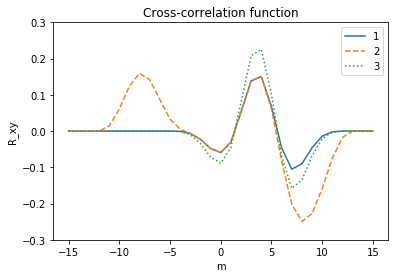

In [15]:
""" Cross-correlation function """
m = list(range(-len(y_n)+1, len(y_n)))
r_x1y_7 = cross_corr_function(x1_n, y_n)
r_x2y_7 = cross_corr_function(x2_n, y_n)
r_x3y_7 = cross_corr_function(x3_n, y_n)

plt.plot(m, r_x1y_7, label = "1")
plt.plot(m, r_x2y_7, '--', label = "2")
plt.plot(m, r_x3y_7, ':', label = "3")
plt.legend()

plt.title("Cross-correlation function")
plt.xlabel("m")
plt.ylabel("R_xy")
plt.ylim([-0.3,0.3])
plt.show()

## 相互相関関数
y_nとx1_nの相互相関関数に対して，x2_nとの相互相関関数は直流成分が影響してm=-8付近でもピークが生起してしまっている．また，x3_nとの相互相関関数はパワーの大きさが影響して値を大きくしてしまっている．

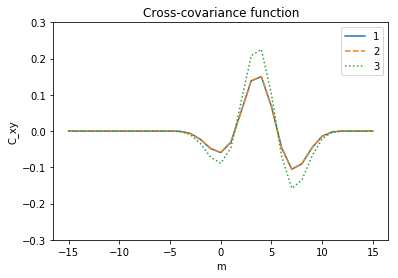

In [16]:
""" Cross-covariance function """
def cross_cova (x, y, m):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    if m == 0:
        cova_sum = ((x - mean_x) * (y - mean_y)).sum()
    elif m < 0:
        cova_sum = ((x[-m:] - mean_x) * (y[:m] - mean_y)).sum()
    else:
        cova_sum = ((x[:-m] - mean_x) * (y[m:] - mean_y)).sum()
    c_xx = (1 / (x.shape[0] - abs(m))) * cova_sum
    return c_xx

def cross_cova_function (x_n, y_n):
    signal_size = x_n.shape[0]
    m = range(-signal_size + 1, signal_size)
    c_xy = []
    for i in m:
        c_xy.append(cross_cova(x_n, y_n, i))
    return np.array(c_xy)

c_x1y_7 = cross_cova_function(x1_n, y_n)
c_x2y_7 = cross_cova_function(x2_n, y_n)
c_x3y_7 = cross_cova_function(x3_n, y_n)

# print(np.max(c_x1y_7))

plt.plot(m, c_x1y_7, label = "1")
plt.plot(m, c_x2y_7, '--', label = "2")
plt.plot(m, c_x3y_7, ':', label = "3")
plt.legend()

plt.title("Cross-covariance function")
plt.xlabel("m")
plt.ylabel("C_xy")
plt.ylim([-0.3,0.3])
plt.show()

## 相互共分散関数
y_nとx1_nの相互相関関数に対して，x2_nとの相互相関関数は直流成分の影響を受けず同様の値を取っている．．しかし，x3_nとの相互相関関数はパワーの大きさが影響して値を大きくしてしまっている．

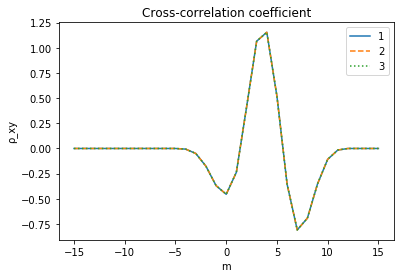

In [17]:
""" Cross-correlation coefficient """

""" 自己共分散関数の関数 """
def auto_cova (x, m):
    mean_x = np.mean(x)
    if m == 0:
        cova_sum = ((x - mean_x) * (x - mean_x)).sum()
    else:
        cova_sum = ((x[:-m] - mean_x) * (x[m:] - mean_x)).sum()
    c_xx = (1 / (x.shape[0] - abs(m))) * cova_sum
    return c_xx

def auto_cova_function (x_n):
    mean_x = np.mean(x_n)
    x_n = x_n - mean_x
    m = range(x_n.shape[0])
    c_xx = []
    for i in m:
        c_xx.append(auto_cova(x_n, i))
#     c_xx = c_xx[::-1] + c_xx[1:]
    return np.array(c_xx)

""" 共分散を求める """
import math
var_y_n = auto_cova_function(y_n)[0]
var_x1_n = auto_cova_function(x1_n)[0]
var_x2_n = auto_cova_function(x2_n)[0]
var_x3_n = auto_cova_function(x3_n)[0]

cc_x1y_7 = cross_cova_function(x1_n, y_n) / math.sqrt(var_y_n * var_x1_n)
cc_x2y_7 = cross_cova_function(x2_n, y_n) / math.sqrt(var_y_n * var_x2_n)
cc_x3y_7 = cross_cova_function(x3_n, y_n) / math.sqrt(var_y_n * var_x3_n)

# print(math.sqrt(var_y_n * var_x1_n))

plt.plot(m, cc_x1y_7, label = "1")
plt.plot(m, cc_x2y_7, '--', label = "2")
plt.plot(m, cc_x3y_7, ':', label = "3")
plt.legend()

plt.title("Cross-correlation coefficient")
plt.xlabel("m")
plt.ylabel("ρ_xy")
plt.show()

## (相互)相関係数
y_nとx1_nの相互相関関数に対して，x2_nとの相互相関関数は直流成分の影響を受けず同様の値を取っている．また，x3_nとの相互相関関数はパワーの大きさの影響を受けず同様の値を取っている．